In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [5]:
# 数据准备
df_model = pd.read_csv("london_model_with_poi.csv")
print(df_model.head())

   LSOA_Code  Year  Vulnerable_Ratio  Population_Density  House_Price  \
0  E01000006  2015          0.325557        13158.253752     196125.0   
1  E01000006  2016          0.319872        12837.653479     349062.5   
2  E01000006  2017          0.322894        12633.015007     408500.0   
3  E01000006  2018          0.329176        12578.444748     379375.0   
4  E01000006  2019          0.315076        12578.444748     247375.0   

   Theft_Rate_per1k  Income_Score_rate  Employment_Score_rate  \
0          1.555210              0.117                  0.059   
1          4.250797              0.117                  0.059   
2          4.859611              0.117                  0.059   
3          8.134490              0.117                  0.059   
4          3.253796              0.117                  0.059   

   Education,_Skills_and_Training_Score  \
0                                14.798   
1                                14.798   
2                                14.798  

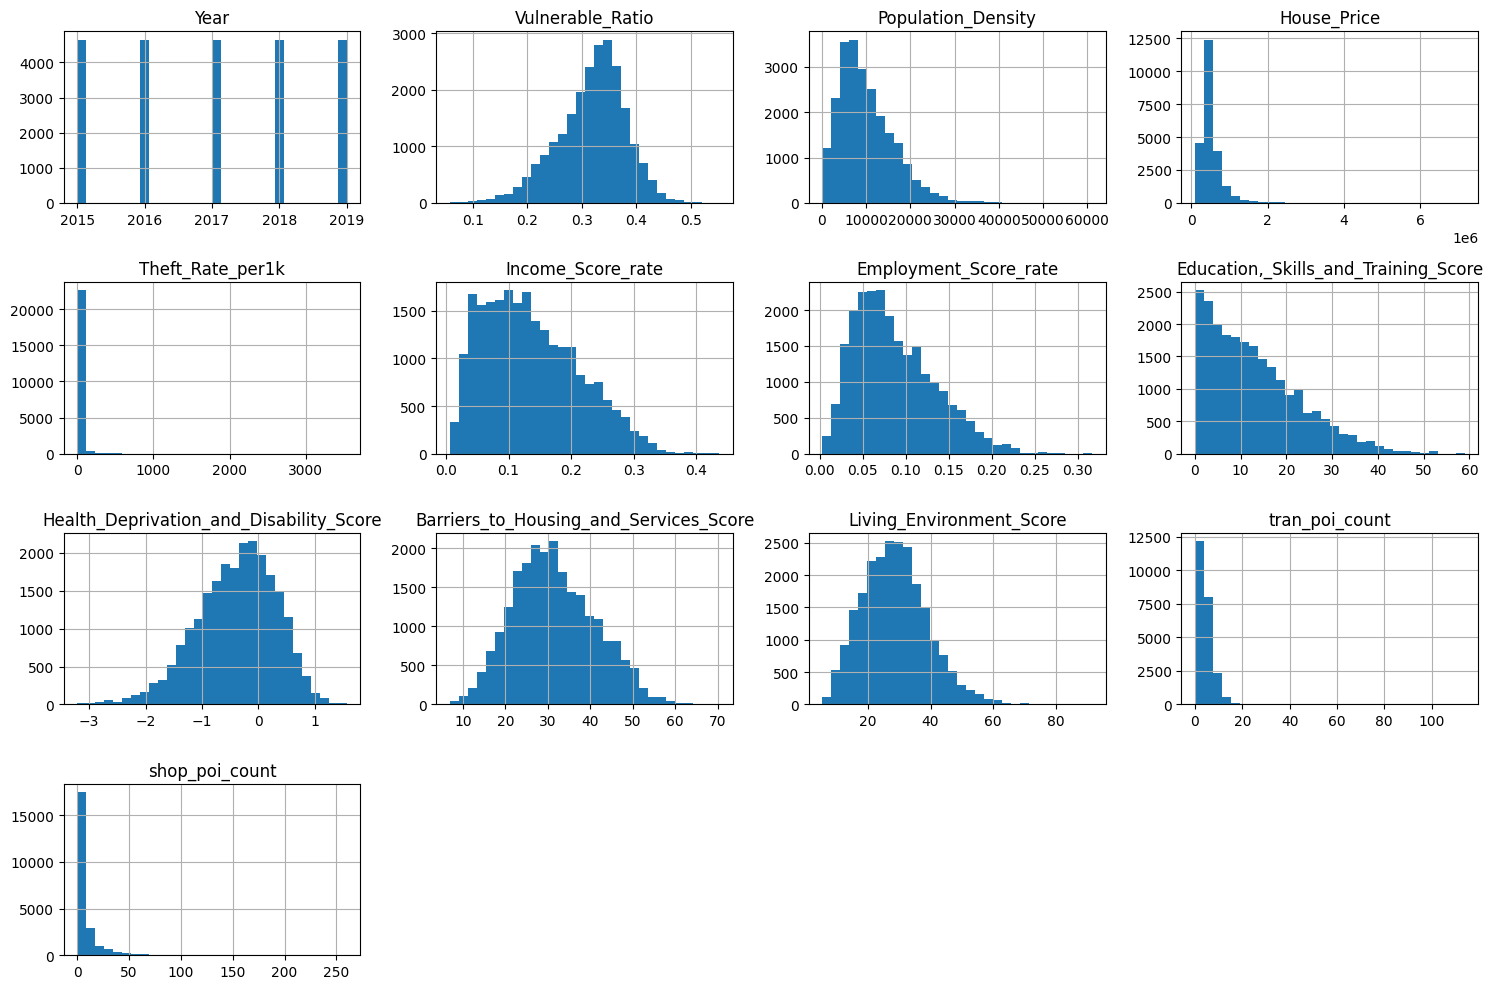

In [6]:
# 直方图
df_model.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
features = df_model.drop(columns=["Theft_Rate_per1k", "LSOA_Code", "Employment_Score_rate"])  # 你要预测的那个记得留出来
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
X = pd.DataFrame(features_scaled, columns=features.columns)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                                    feature       VIF
0                                      Year  1.009638
1                          Vulnerable_Ratio  2.128764
2                        Population_Density  1.980572
3                               House_Price  1.583846
4                         Income_Score_rate  4.506444
5      Education,_Skills_and_Training_Score  2.470923
6   Health_Deprivation_and_Disability_Score  3.461406
7    Barriers_to_Housing_and_Services_Score  1.568236
8                  Living_Environment_Score  1.738073
9                            tran_poi_count  1.416755
10                           shop_poi_count  1.368538


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = sm.add_constant(X)  # 加常数项
y = df_model["Theft_Rate_per1k"]
ols_model = sm.OLS(y, X).fit()
y_pred_log = ols_model.predict(X)
y_pred = np.expm1(y_pred_log)

print(ols_model.summary())
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

                            OLS Regression Results                            
Dep. Variable:       Theft_Rate_per1k   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1902.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:37:52   Log-Likelihood:            -1.2454e+05
No. Observations:               23265   AIC:                         2.491e+05
Df Residuals:                   23253   BIC:                         2.492e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

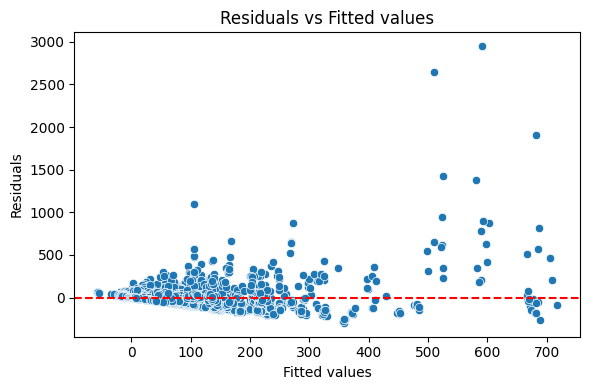

In [11]:
import seaborn as sns

residuals = y - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted values")
plt.tight_layout()
plt.show()


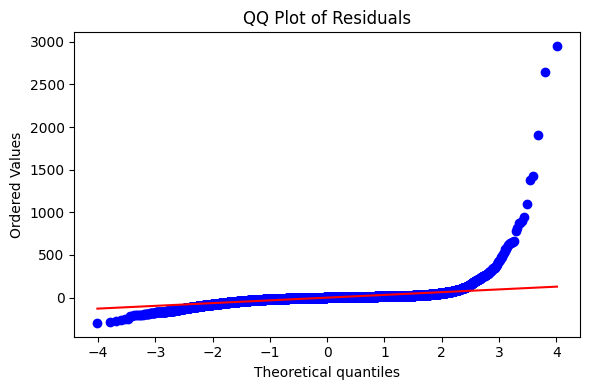

In [12]:
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

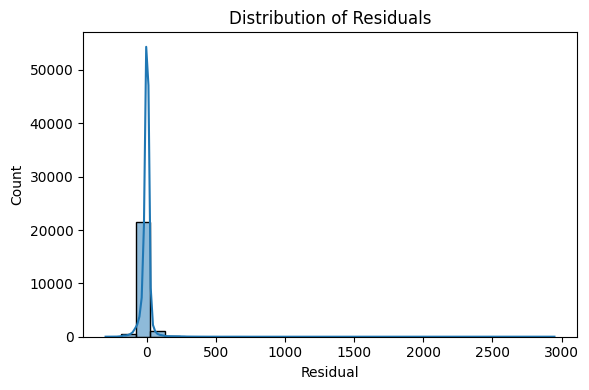

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residual")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

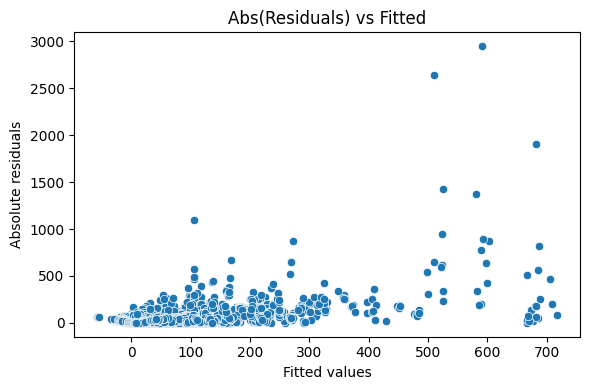

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel("Fitted values")
plt.ylabel("Absolute residuals")
plt.title("Abs(Residuals) vs Fitted")
plt.tight_layout()
plt.show()